🎯 Learning Objectives
By the end of this activity, I will be able to:
Create and activate a Python virtual environment using venv.
Use pip to install the packages I need (matplotlib, seaborn, jupyter, scipy).
Work in a Jupyter Notebook and document my process with markdown cells.
Calculate summary statistics for Anscombe’s Quartet:
a) Mean of x and y
Sample variance of x and y
Correlation between x and y
Linear regression line
Coefficient of determination (R²)
Visualize Anscombe’s Quartet and apply Tufte’s principles of good visualization.
Explain and apply concepts like data-to-ink ratio, small multiples, and chartjunk removal.
Write clear explanations of my findings and reflections.
Use GitHub to track my progress with multiple commits.
Add my notebook and examples to my personal website on GitHub Pages.
Search online resources and use generative AI effectively to solve problems.
Share what I have learned with a peer (“each one teach one”).




In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Manually define Anscombe's Quartet
data = {
    "dataset": (["I"]*11 + ["II"]*11 + ["III"]*11 + ["IV"]*11),
    "x": [10,8,13,9,11,14,6,4,12,7,5,
          10,8,13,9,11,14,6,4,12,7,5,
          10,8,13,9,11,14,6,4,12,7,5,
          8,8,8,8,8,8,8,19,8,8,8],
    "y": [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68,
          9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74,
          7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73,
          6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]
}

anscombe = pd.DataFrame(data)
anscombe.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


“Now I will calculate the mean, variance, correlation, regression line, and R² for each dataset.”

In [ ]:
# Group by dataset and calculate stats
results = []

for dataset, group in anscombe.groupby("dataset"):
    x = group["x"]
    y = group["y"]
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)   # sample variance
    var_y = np.var(y, ddof=1)
    corr = np.corrcoef(x, y)[0,1]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2
    
    results.append([dataset, mean_x, mean_y, var_x, var_y, corr, slope, intercept, r_squared])

import pandas as pd
stats_table = pd.DataFrame(results, columns=["Dataset", "Mean X", "Mean Y", "Var X", "Var Y", "Correlation", "Slope", "Intercept", "R²"])
stats_table

Although the summary statistics are nearly identical, the visualizations show very different patterns.”

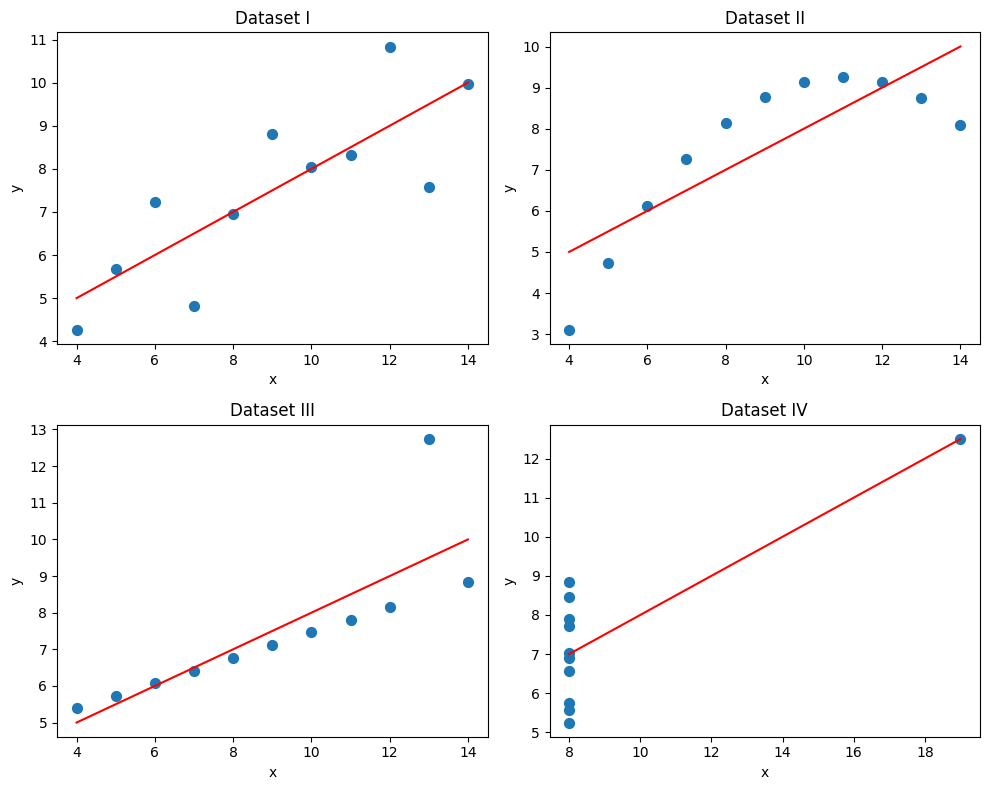

In [7]:
# Scatterplots with regression lines

fig, axes = plt.subplots(2, 2, figsize=(10,8))

for i, dataset in enumerate(["I", "II", "III", "IV"]):
    ax = axes[i//2, i%2]
    group = anscombe[anscombe["dataset"] == dataset]
    
    # Scatter
    ax.scatter(group["x"], group["y"], s=50)
    
    # Regression line
    slope, intercept, _, _, _ = stats.linregress(group["x"], group["y"])
    x_vals = np.linspace(group["x"].min(), group["x"].max(), 100)
    ax.plot(x_vals, intercept + slope*x_vals, color="red")
    
    ax.set_title(f"Dataset {dataset}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()

Dataset I:
  Mean of x: 9.00, Mean of y: 7.50
  Variance of x: 11.00, Variance of y: 4.13
  Correlation: 0.82
  Regression line: y = 0.50x + 3.00
----------------------------------------


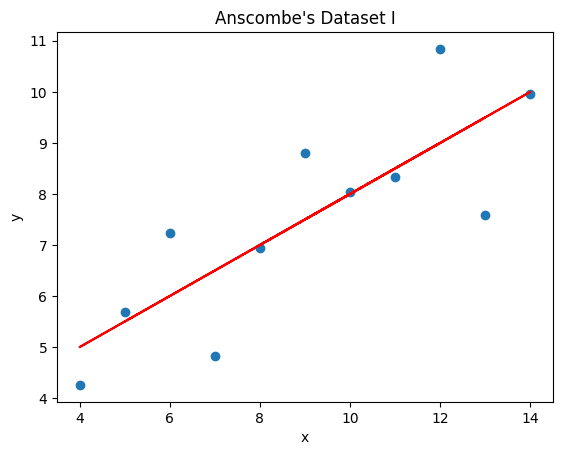

Dataset II:
  Mean of x: 9.00, Mean of y: 7.50
  Variance of x: 11.00, Variance of y: 4.13
  Correlation: 0.82
  Regression line: y = 0.50x + 3.00
----------------------------------------


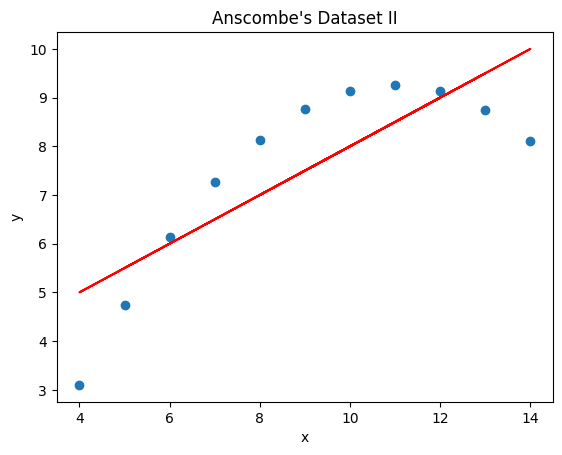

Dataset III:
  Mean of x: 9.00, Mean of y: 7.50
  Variance of x: 11.00, Variance of y: 4.12
  Correlation: 0.82
  Regression line: y = 0.50x + 3.00
----------------------------------------


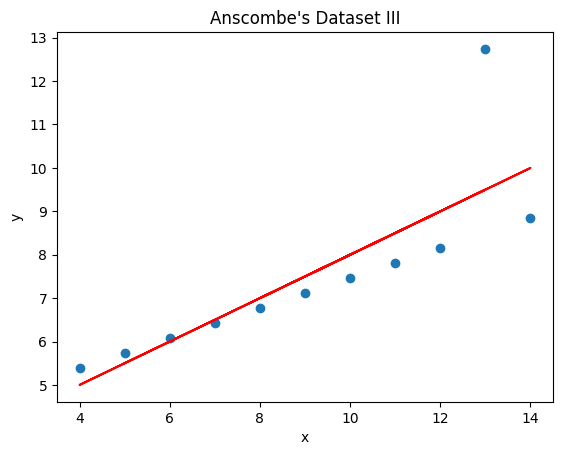

Dataset IV:
  Mean of x: 9.00, Mean of y: 7.50
  Variance of x: 11.00, Variance of y: 4.12
  Correlation: 0.82
  Regression line: y = 0.50x + 3.00
----------------------------------------


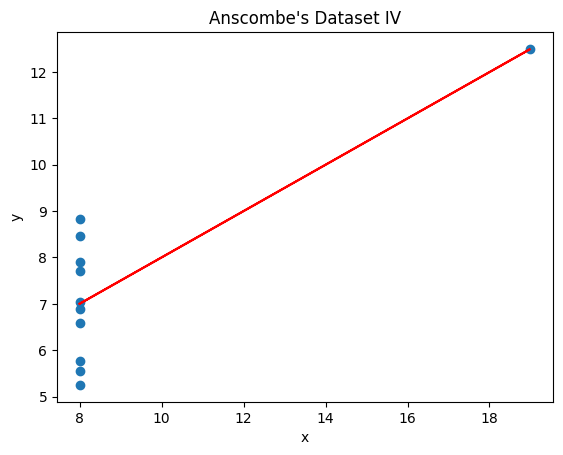

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Anscombe's Quartet data
data = {
    'I': {'x':[10,8,13,9,11,14,6,4,12,7,5], 'y':[8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]},
    'II': {'x':[10,8,13,9,11,14,6,4,12,7,5], 'y':[9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]},
    'III': {'x':[10,8,13,9,11,14,6,4,12,7,5], 'y':[7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]},
    'IV': {'x':[8,8,8,8,8,8,8,19,8,8,8], 'y':[6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]}
}

# Loop through each dataset
for key, dataset in data.items():
    x = np.array(dataset['x'])
    y = np.array(dataset['y'])
    
    # Calculate statistics
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_var = np.var(x, ddof=1)   # sample variance
    y_var = np.var(y, ddof=1)
    correlation = np.corrcoef(x, y)[0,1]
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Print results
    print(f"Dataset {key}:")
    print(f"  Mean of x: {x_mean:.2f}, Mean of y: {y_mean:.2f}")
    print(f"  Variance of x: {x_var:.2f}, Variance of y: {y_var:.2f}")
    print(f"  Correlation: {correlation:.2f}")
    print(f"  Regression line: y = {slope:.2f}x + {intercept:.2f}")
    print("-"*40)
    
    # Optional: Plot each dataset with regression line
    plt.scatter(x, y, label=f'Dataset {key}')
    plt.plot(x, slope*x + intercept, color='red')
    plt.title(f"Anscombe's Dataset {key}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()